## ラベリング 4近傍

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# labeling 4 nearest neighbor
def labeling_4nn(img):
    H,W,C = img.shape
    
    # prepare label temporary image
    label = np.zeros((H, W), dtype=np.int)
    label[img[..., 0]>0] = 1  # 画像で黒じゃないところはラベルを１にしておく
    
    # look up table
    LUT = [0 for _ in range(H*W)]  # H*W=60000
    
    n = 1
    
    for y in range(H):
        for x in range(W):
            # skip black pixel
            # labelが０なら何もしない
            if label[y,x] == 0:
                continue
            # get above pixel
            c3 = label[max(y-1, 0), x]
            # get left pixel
            c5 = label[y, max(x-1, 0)]
            
            # if not labeled
            if c3 < 2 and c5 < 2:  # この２はどこから来た？
                # labeling
                n += 1
                label[y,x] = n
            else:
                # replace min lable index
                _vs = [c3, c5]  # 上と左のラベルを格納
                vs = [a for a in _vs if a > 1]  # ラベルが１以上のものをvsに格納する
                v = min(vs)   # vsの中で最小のものをvに格納
                label[y,x] = v
                # label[y, x]のラベルをvにする
                
                minv = v
                for _v in vs:  # 2以上のラベル
                    if LUT[_v] != 0:
                        minv = min(minv, LUT[_v])
                for _v in vs:
                    LUT[_v] = minv
                
    # ここのインシデント間違ってた            
    count = 1
        
    # integrate index of look up table
    for l in range(2, n+1):
        flag = True
        for i in range(n+1):
            if LUT[i] == l:
                if flag:
                    count += 1
                    flag = False
                LUT[i] = count
        # draw color
    COLORS = [[0, 0, 255], [0, 255, 0], [255, 0, 0], [255, 255, 0]]
    out = np.zeros((H, W, C), dtype=np.uint8)

    for i, lut in enumerate(LUT[2:]):
        out[label == (i+2)] = COLORS[lut-2]

    return out
            

    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(200, 300, 3)


True

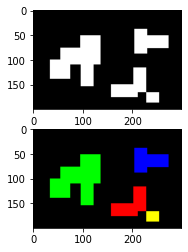

In [30]:
# Read image
img = cv2.imread("../seg.png").astype(np.float32)
plt.subplot(2, 1, 1)
print(img.shape)
plt.imshow(img)
# labeling 4 nearest neighbor
out = labeling_4nn(img)

# Save result
plt.subplot(2, 1, 2)
plt.imshow(out)
cv2.imwrite("out58.png", out)


True

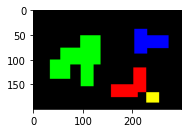

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# labeling 4 nearest neighbor
def labeling_4nn(img):
    # get image shape
    H, W, C = img.shape

    # prepare label tempolary image
    label = np.zeros((H, W), dtype=np.int)
    label[img[..., 0]>0] = 1

    # look up table
    LUT = [0 for _ in range(H*W)]

    n = 1

    for y in range(H):
        for x in range(W):
            # skip black pixel
            if label[y, x] == 0:
                continue
            
            # get above pixel
            c3 = label[max(y-1,0), x]

            # get left pixel
            c5 = label[y, max(x-1,0)]

            # if not labeled
            if c3 < 2 and c5 < 2:
                # labeling
                n += 1
                label[y, x] = n
            else:
                # replace min label index
                _vs = [c3, c5]
                vs = [a for a in _vs if a > 1]
                v = min(vs)
                label[y, x] = v
                
                minv = v
                for _v in vs:
                    if LUT[_v] != 0:
                        minv = min(minv, LUT[_v])
                for _v in vs:
                    LUT[_v] = minv
     
    
    
    count = 1

    # integrate index of look up table
    for l in range(2, n+1):
        flag = True
        for i in range(n+1):
            if LUT[i] == l:
                if flag:
                    count += 1
                    flag = False
                LUT[i] = count

    # draw color
    COLORS = [[0, 0, 255], [0, 255, 0], [255, 0, 0], [255, 255, 0]]
    out = np.zeros((H, W, C), dtype=np.uint8)

    for i, lut in enumerate(LUT[2:]):
        out[label == (i+2)] = COLORS[lut-2]

    return out
    

# Read image
img = cv2.imread("../seg.png").astype(np.float32)

# labeling 4 nearest neighbor
out = labeling_4nn(img)

# Save result
plt.subplot(2, 1, 2)
plt.imshow(out)
cv2.imwrite("out58.png", out)
